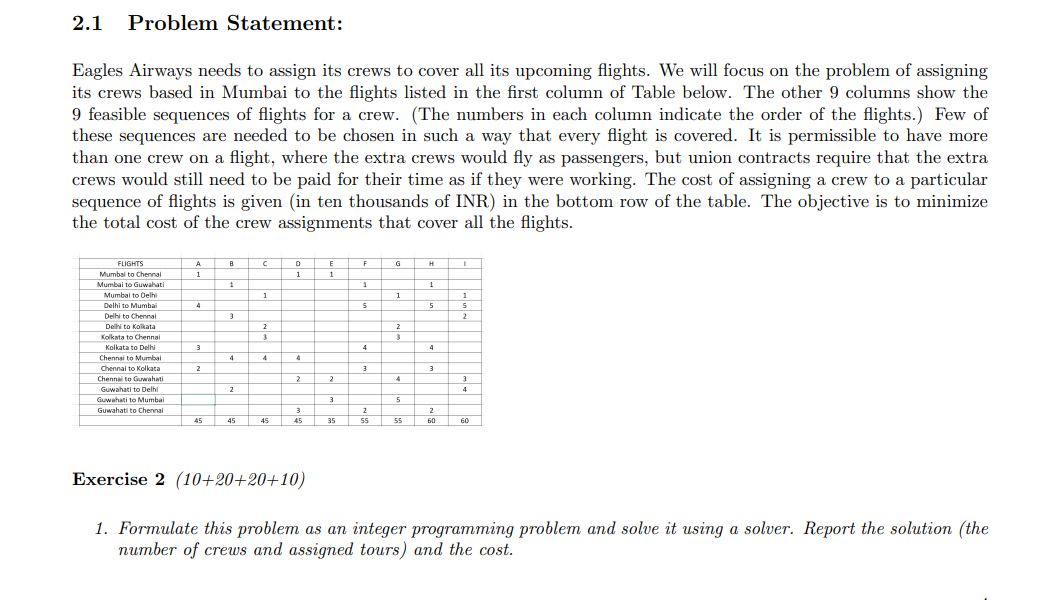

image.png

#Question 2.1

**Minimize:**

$\sum_{i=1}^{8} x_i \cdot \text{costs}[i] $

**Subject to:**

 $\sum_{j=1}^{8} \text{incidence_mat}[i][j] \cdot x_j \geq 1 \quad \text{for all}  \quad i \in \{1, 2, \ldots, 8\} $


**Variables:**


$x_i \in \{0, 1\} \quad \text{for all} \quad i \in \{1, 2, \ldots, 8\}$

**Explanation:**

**Objective:**
Minimize the total cost of selected tours, calculated as the summation of the product of decision variables \(x_i\) and the corresponding tour costs.

**Constraints:** Ensure that each flight is covered by at least one selected tour. The sum of the product of incidence matrix entries and decision variables for each tour \(i\) must be greater than or equal to 1, indicating coverage for each flight.

**Decision Variables:** \(x_i\) represents whether tour \(i\) is selected (1) or not (0). These binary variables dictate the inclusion or exclusion of tours in the crew assignment, facilitating efficient crew allocation while meeting coverage requirements and minimizing costs.


In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
from pyomo.environ import*

In [ ]:
import numpy as np
import time

In [ ]:
#Define subsets and corresponding costs
subsets = [
    {0, 3, 7, 9}, #corresponding column A
    {1, 4, 8, 11},#corresponding column B
    {3, 6, 7, 9},#corresponding column C
    {0, 8, 10, 13},  #corresponding column D
    {0, 10, 12},     #corresponding column E
    {1, 3, 7, 9, 13},   #corresponding column F
    {2, 5, 6, 10, 12},   #corresponding column G
    {1, 3, 7, 9, 13},    #corresponding column H
    {2, 3, 4, 10, 11}     #corresponding column I
]
my_costs = [45, 45, 45, 45, 35, 55, 55, 60, 60]

# Create incidence matrix
incidence_matrix = np.zeros((len(subsets), 14))

# Fill in the matrix based on the subsets
for i, my_subset in enumerate(subsets):
    for flight_index in my_subset:
        incidence_matrix[i, flight_index] = 1

# Display the incidence matrix
print(incidence_matrix)

[[1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]


**Incident matrix**
The incidence matrix serves as a crucial tool in combinatorial optimization problems, particularly in scenarios like crew assignment to flights. It provides a clear and concise representation of the connection between two sets of elements: tours (or crew assignments) and flights.

In essence, the matrix employs binary notation to indicate whether a specific flight is part of a particular tour. Each row of the matrix corresponds to a tour, while each column represents a flight. A value of 1 in the matrix entry incidence_mat[i][j] signifies that flight j is included in tour i, while a value of 0 denotes exclusion.

By examining the rows of the incidence matrix, we can easily determine which flights are assigned to each tour. This information is invaluable for optimization tasks aimed at minimizing costs or maximizing efficiency in crew assignment. The structured format of the incidence matrix facilitates the analysis and resolution of complex crew assignment challenges by providing a clear overview of the relationships between tours and flights.

In [ ]:
model = ConcreteModel()
model.x = Var(range(8),domain=Binary)
model.obj = Objective(expr=sum(model.x[i]*my_costs[i] for i in range(8)), sense=minimize)
model.constraints = ConstraintList()
for i in range(8):
    model.constraints.add(sum(incidence_matrix[i][j] * model.x[j] for j in range(8)) >= 1)
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
start_time_ip = time.time()
result = solver.solve(model)
print(result)
end_time_ip = time.time()
print("Decision Variables:")
for i in range(8):
    print(f"x[{i}] =", value(model.x[i]))



num_crews_used = sum(value(model.x[i]) for i in range(8))
print("Number of crews used:", num_crews_used)
print("Crews used:")
for i in range(8):
    if value(model.x[i]) == 1:
        print(f"Crew {i}")

total_cost_ip_1 = sum(value(model.x[i]) * my_costs[i] for i in range(8))
print("Total cost incurred (10k INR):", total_cost_ip_1)


Problem: 
- Name: unknown
  Lower bound: 145.0
  Upper bound: 145.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 8
  Number of nonzeros: 19
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.004180431365966797
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Decision Variables:
x[0] = 1.0
x[1] = 1.0
x[2] = 0.0
x[3] = 0.0
x[4] = 0.0
x[5] = 0.0
x[6] = 1.0
x[7] = 0.0
Number of crews used: 3.0
Crews used:
Crew 0
Crew 1
Crew 6
Total cost incurred (10k INR): 145.0


#Question 2.2

 the universal set comprises all flights that require coverage. Referencing the provided table, we can identify the unique flights as follows:

1. Mumbai to Chennai
2. Mumbai to Guwahati
3. Delhi to Mumbai
4. Delhi to Chennai
5. Delhi to Kolkata
6. Kolkata to Delhi
7. Chennai to Mumbai
8. Chennai to Kolkata
9. Chennai to Guwahati
10. Guwahati to Delhi

Therefore, the universal set U consists of these flights:
=
{
Mumbai to Chennai
,
Mumbai to Guwahati
,
Delhi to Mumbai
,
Delhi to Chennai
,
Delhi to Kolkata
,
Kolkata to Delhi
,
Chennai to Mumbai
,
Chennai to Kolkata
,
Chennai to Guwahati
,
Guwahati to Delhi
}

U={Mumbai to Chennai,Mumbai to Guwahati,Delhi to Mumbai,Delhi to Chennai,Delhi to Kolkata,Kolkata to Delhi,Chennai to Mumbai,Chennai to Kolkata,Chennai to Guwahati,Guwahati to Delhi}

Now, let's define the subsets based on the provided table. Each subset represents a crew's feasible sequence of flights. For example:

Subset 1: Crew's sequence of flights for Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi.

Subset 2: Crew's sequence of flights for Mumbai to Guwahati, Mumbai to Guwahati, and Chennai to Kolkata.

Subset 3: Crew's sequence of flights for Delhi to Mumbai, Delhi to Chennai, and Guwahati to Delhi.
... and so on.

Each subset consists of the flights that the crew must cover. For instance, Subset 1 includes flights from Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi, indicating the flights this crew is assigned to cover.

The purpose of selecting these subsets is to ensure representation of each crew's feasible flight sequences. This aids in identifying the minimum cost combination of crews required to efficiently cover all flights. Each subset corresponds to a crew's potential flight sequence, and our objective is to determine the minimum number of crews needed to cover all flights.

Implementation of the algorithm

In [ ]:
# def greedy_weighted_set_cover(my_subsets, my_costs, my_universal_set):
#     I = set()
#     my_subsets_used = []
#     while I != set(my_universal_set):
#         cost_cover_ratio = []
#         for i in range(len(my_subsets)):
#             remaining_elements = my_subsets[i] - I
#             if len(remaining_elements) > 0:
#                 ratio = my_costs[i] / len(remaining_elements)
#                 cost_cover_ratio.append((ratio, i))
#         if not cost_cover_ratio:
#             break
#         min_ratio, min_ratio_index = min(cost_cover_ratio)
#         I = I.union(my_subsets[min_ratio_index])
#         my_subsets_used.append(min_ratio_index)
#     return my_subsets_used

# start_time_greedy = time.time()
# selected_subsets = greedy_weighted_set_cover(subsets, my_costs, range(14))
# end_time_greedy = time.time()
# total_cost_greedy1 = 0
# for i in selected_subsets:
#   total_cost_greedy1 = total_cost_greedy1 + my_costs[i]

# print("feasible subsets are :", selected_subsets)
# print("The total cost for greedy 1  in 10k INR is:" ,total_cost_greedy1)

In [ ]:
def greedy_weighted_set_cover(subsets, costs, universal_set):
    selected_subsets = []
    covered_elements = set()
    while covered_elements != set(universal_set):
        cost_cover_ratio = []
        for i, subset in enumerate(subsets):
            remaining_elements = subset - covered_elements
            if remaining_elements:
                ratio = costs[i] / len(remaining_elements)
                cost_cover_ratio.append((ratio, i))
        if not cost_cover_ratio:
            break
        min_ratio, min_ratio_index = min(cost_cover_ratio)
        covered_elements.update(subsets[min_ratio_index])
        selected_subsets.append(min_ratio_index)
    return selected_subsets

start_time_greedy = time.time()
selected_subsets = greedy_weighted_set_cover(subsets, my_costs, range(14))
end_time_greedy = time.time()

total_cost_greedy1 = sum(my_costs[i] for i in selected_subsets)

print("Selected subsets:", selected_subsets)
print("Total cost for Greedy 1 in 10k INR:", total_cost_greedy1)


Selected subsets: [5, 6, 1, 4]
Total cost for Greedy 1 in 10k INR: 190


#Question 2.3

In [ ]:
# Remove the 6th column from the incidence matrix
updated_incidence_mat = np.delete(incidence_matrix, 5, axis=1)

# Define the optimization model
model = ConcreteModel()

# Define decision variables
model.x = Var(range(8), domain=Binary)

# Define objective function
model.obj = Objective(expr=sum(model.x[i] * my_costs[i] for i in range(8)), sense=minimize)

# Define constraints
model.constraints = ConstraintList()
for i in range(8):
    model.constraints.add(
        sum(updated_incidence_mat[i][j] * model.x[j] for j in range(7)) >= 1
    )


In [ ]:
# Solve the optimization problem
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
start_time_ip1 = time.time()
result = solver.solve(model)
end_time_ip1 = time.time()

# Print results
num_crews_used = sum(value(model.x[i]) for i in range(8))
print("Number of crews used:", num_crews_used)

print("Crews used:")
for i in range(8):
    if value(model.x[i]) == 1:
        print(f"Crew {i}")

total_cost_lp2 = sum(value(model.x[i]) * my_costs[i] for i in range(8))
print("Total cost incurred:", total_cost_lp2)

Number of crews used: 3.0
Crews used:
Crew 0
Crew 1
Crew 5
Total cost incurred: 145.0


In [ ]:
# Define the updated subsets and costs (excluding Chennai to Guwahati)
subsets_without_chennai_guwahati = [
    {0, 3, 7, 9},
    {1, 4, 8, 11},
    {3, 6, 7, 9},
    {0, 8, 10, 13},
    {0, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 5, 6, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 3, 4, 10, 11}
]

costs_without_chennai_guwahati = [45, 45, 45, 45, 35, 55, 55, 60, 60]

In [ ]:
# Call the greedy algorithm with updated subsets and costs
start_time_greedy1 = time.time()
selected_subsets_greedy = greedy_weighted_set_cover(subsets_without_chennai_guwahati, costs_without_chennai_guwahati, range(14))
end_time_greedy1 = time.time()

# Print results
print("Feasible subsets using Greedy Algorithm are:", selected_subsets_greedy)

total_cost_greedy2 = sum(my_costs[i] for i in selected_subsets_greedy)
print("The total cost in greedy 2 in 10k INR is:", total_cost_greedy2)
print('Time Taken by the Algorithm: ', end_time_greedy1-start_time_greedy1)

Feasible subsets using Greedy Algorithm are: [5, 6, 1, 4]
The total cost in greedy 2 in 10k INR is: 190
Time Taken by the Algorithm:  0.001024007797241211


#Question 2.4   part(a)  & part(b)

In [ ]:
# Calculate running time and objective values
running_time_ip = end_time_ip - start_time_ip
objective_value_ip = total_cost_ip_1
running_time_greedy = end_time_greedy - start_time_greedy
objective_value_greedy = total_cost_greedy1

# Calculate ratio of objective values
ratio_objective_values = objective_value_ip / objective_value_greedy

# Print results
print("Running time using IP solver:", running_time_ip)
print("Running time using Greedy Algorithm:", running_time_greedy)
print("Ratio of objectives (IP to Greedy):", ratio_objective_values)

print('\n')
print('part b ..................................')
print('\n')
# Calculate running time and objective values
running_time_ip = end_time_ip1 - start_time_ip1
objective_value_ip = total_cost_lp2
running_time_greedy = end_time_greedy1 - start_time_greedy1
objective_value_greedy = total_cost_greedy2

# Calculate ratio of objective values
ratio_objective_values = objective_value_ip / objective_value_greedy

# Print results

print("Running time using IP solver:", running_time_ip)
print("Running time using Greedy Algorithm:", running_time_greedy)
print("Ratio of objectives (IP to Greedy):", ratio_objective_values)

Running time using IP solver: 0.013524055480957031
Running time using Greedy Algorithm: 0.006970405578613281
Ratio of objectives (IP to Greedy): 0.7631578947368421


part b ..................................


Running time using IP solver: 0.04032540321350098
Running time using Greedy Algorithm: 0.001024007797241211
Ratio of objectives (IP to Greedy): 0.7631578947368421
